In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

In [18]:
df = pd.read_csv("../data/Salary_dataset.csv")

In [19]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [20]:
df.shape

(30, 3)

In [21]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [22]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [23]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

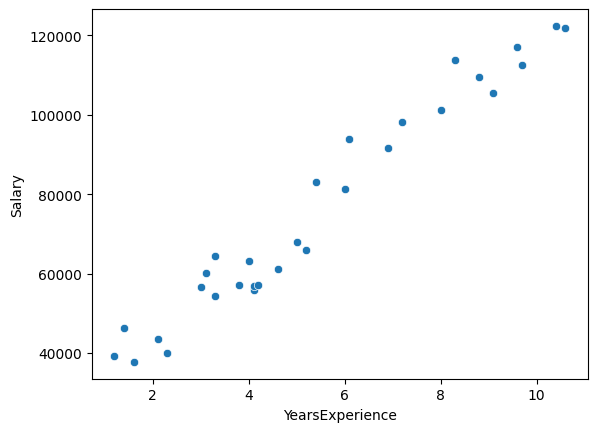

In [24]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df[['YearsExperience']], df['Salary'], test_size=0.2, random_state=42)

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [28]:
data = {
    "mse" : [mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test)],
    "rmse" : [root_mean_squared_error(y_train, y_pred_train), root_mean_squared_error(y_test, y_pred_test)],
    "r2" : [r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)],
}

In [29]:
print(pd.DataFrame(data, index=['Train', 'Test']))

                mse         rmse        r2
Train  2.710225e+07  5205.982110  0.964540
Test   4.983010e+07  7059.043622  0.902446


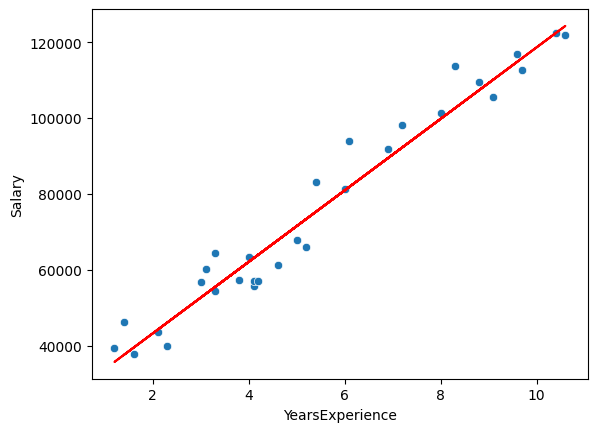

In [30]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.plot(X_train, y_pred_train, color='red', label='Train Prediction')